
# Davis Club

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1

#Friends, Member
17 Evelyn Jefferson
15 Laura Mandeville
17 Theresa Anderson
15 Brenda Rogers
11 Charlotte McDowd
15 Frances Anderson
15 Eleanor Nye
16 Pearl Oglethorpe
17 Ruth DeSand
17 Verne Sanderson
16 Myra Liddel
16 Katherina Rogers
17 Sylvia Avondale
17 Nora Fayette
17 Helen Lloyd
16 Dorothy Murchison
12 Olivia Carleton
12 Flora Price

#Friend meetings, Member
50 Evelyn Jefferson

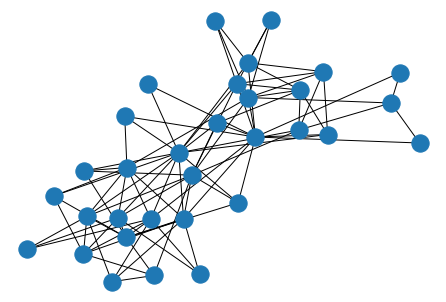

In [6]:
import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd

#Start of supplied python code to make the graphs for womens
G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

# project bipartite graph onto women nodes
W = bipartite.projected_graph(G, women)
print()
print("#Friends, Member")
for w in women:
    print(f"{W.degree(w)} {w}")

# project bipartite graph onto women nodes keeping number of co-occurrence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
print("#Friend meetings, Member")
for w in women:
    print(f"{W.degree(w, weight='weight')} {w}")

pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos)
plt.show()


#End of supplied python code

In [15]:
W_unweighted = bipartite.projected_graph(G, women)

W_weighted = bipartite.weighted_projected_graph(G, women)

degree_centrality = nx.degree_centrality(W_weighted)
betweenness_centrality = nx.betweenness_centrality(W_weighted)
closeness_centrality = nx.closeness_centrality(W_weighted)
eigenvector_centrality = nx.eigenvector_centrality(W_weighted)

#Create a DataFrame to display centrality measures
centrality_df = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Closeness Centrality': closeness_centrality,
    'Eigenvector Centrality': eigenvector_centrality
})
centrality_df




,Degree Centrality,Betweenness Centrality,Closeness Centrality,Eigenvector Centrality
Evelyn Jefferson,1.000000,0.010122,1.000000,0.253524
Laura Mandeville,0.882353,0.002674,0.894737,0.230973
Theresa Anderson,1.000000,0.010122,1.000000,0.253524
Brenda Rogers,0.882353,0.002674,0.894737,0.230973
Charlotte McDowd,0.647059,0.000000,0.739130,0.172527
Frances Anderson,0.882353,0.002674,0.894737,0.230973
Eleanor Nye,0.882353,0.002674,0.894737,0.230973
Pearl Oglethorpe,0.941176,0.005348,0.944444,0.243157
Ruth DeSand,1.000000,0.010122,1.000000,0.253524
Verne Sanderson,1.000000,0.010122,1.000000,0.253524


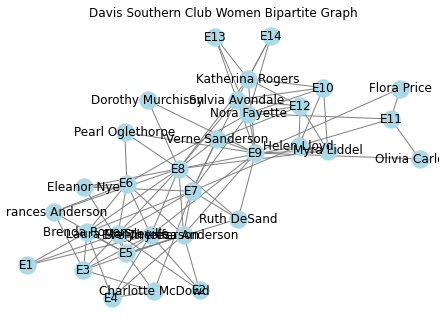

In [11]:
#Visualize the original bipartite graph
pos = nx.spring_layout(G, seed=648)  # Seed layout for reproducible node positions
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
plt.title("Davis Southern Club Women Bipartite Graph")
plt.show()



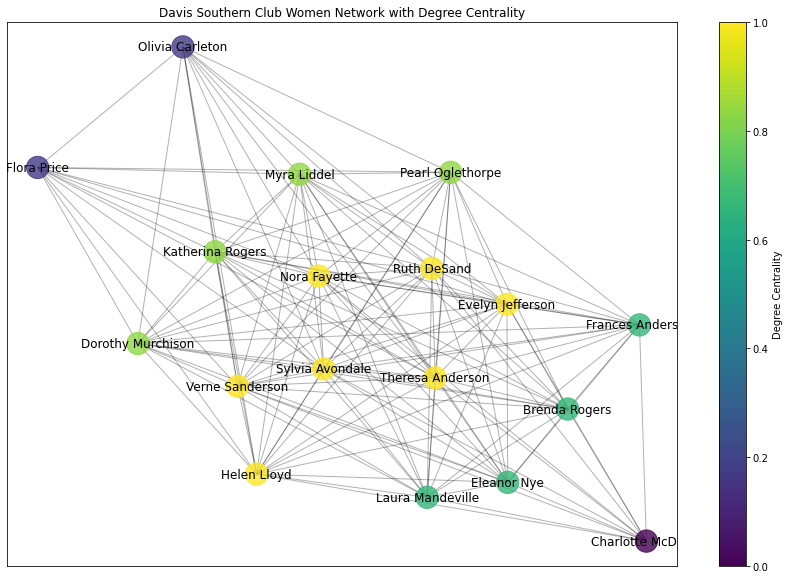

In [12]:
#Visualize the weighted projected graph with centrality measures
plt.figure(figsize=(15, 10))
pos_projected = nx.spring_layout(W_weighted, seed=648)

#Draw the network nodes
node_color = list(degree_centrality.values())
nx.draw_networkx_nodes(W_weighted, pos_projected, node_color=node_color, cmap=plt.cm.viridis, node_size=500, alpha=0.8)

#Draw the network edges
nx.draw_networkx_edges(W_weighted, pos_projected, alpha=0.3)

#Draw node labels
nx.draw_networkx_labels(W_weighted, pos_projected, font_size=12)

plt.title("Davis Southern Club Women Network with Degree Centrality")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis), label='Degree Centrality')
plt.show()